# Project: Wrangling and Analyze Data

## Data Gathering



In [170]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [171]:
# #Import all libraries needed  
import pandas as pd
import numpy as np
import requests
import json
import time
import tweepy
import re
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline

 1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [172]:
# Read the dataset from CSV file
Twitter_archive = pd.read_csv('C:/Users/HudaALAttasJEDSA/Documents/project 4/twitter-archive-enhanced.csv')
Twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [173]:
# download URL file by requests library.
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

# Read the dataset
Image_predictions= pd.read_csv('image-predictions.tsv', sep = '\t')
Image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [174]:
url = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
response = requests.get(url)

with open('tweet-json.txt', mode = 'wb') as file:
    file.write(response.content)

In [175]:
#read lines from text file.
tweetsList = []
with open('tweet-json.txt', 'r') as file:
    tweets = file.readlines()
    for line in tweets:
        tweets_json = json.loads(line)
        tweetsList.append({'tweet_id': tweets_json['id'],
                        'retweet_count': tweets_json['retweet_count'],
                        'favorite_count': tweets_json['favorite_count'],
                        'retweet_count': tweets_json['retweet_count'],
                         'source': tweets_json['source'],
                         ##'retweets': tweets_json['retweets']
                          })

In [176]:
#create dataFrame 
API_json = pd.DataFrame(tweetsList, columns = ['tweet_id', 'favorite_count', 
                                                       'retweet_count',
                                                       'source'])
API_json

,tweet_id,favorite_count,retweet_count,source
0,892420643555336193,39467,8853,"<a href=""http://twitter.com/download/iphone"" r..."
1,892177421306343426,33819,6514,"<a href=""http://twitter.com/download/iphone"" r..."
2,891815181378084864,25461,4328,"<a href=""http://twitter.com/download/iphone"" r..."
3,891689557279858688,42908,8964,"<a href=""http://twitter.com/download/iphone"" r..."
4,891327558926688256,41048,9774,"<a href=""http://twitter.com/download/iphone"" r..."
...,...,...,...,...
2349,666049248165822465,111,41,"<a href=""http://twitter.com/download/iphone"" r..."
2350,666044226329800704,311,147,"<a href=""http://twitter.com/download/iphone"" r..."
2351,666033412701032449,128,47,"<a href=""http://twitter.com/download/iphone"" r..."
2352,666029285002620928,132,48,"<a href=""http://twitter.com/download/iphone"" r..."


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.




In [177]:
Twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [178]:
Twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [179]:
Twitter_archive.duplicated().sum()

0

In [180]:
Twitter_archive.tweet_id.duplicated().sum()

0

In [181]:
sum(Twitter_archive.rating_numerator.isnull())

0

In [182]:
Twitter_archive.describe(include='object').transpose()

,count,unique,top,freq
timestamp,2356,2356,2017-08-01 16:23:56 +0000,1
source,2356,4,"<a href=""http://twitter.com/download/iphone"" r...",2221
text,2356,2356,This is Phineas. He's a mystical boy. Only eve...,1
retweeted_status_timestamp,181,181,2017-07-19 00:47:34 +0000,1
expanded_urls,2297,2218,https://twitter.com/dog_rates/status/667152164...,2
name,2356,957,None,745
doggo,2356,2,None,2259
floofer,2356,2,None,2346
pupper,2356,2,None,2099
puppo,2356,2,None,2326


In [183]:
Image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [184]:
Image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [185]:
Image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [186]:
Image_predictions.duplicated().sum()

0

In [187]:
Image_predictions.describe(include='object').transpose()

,count,unique,top,freq
jpg_url,2075,2009,https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg,2
p1,2075,378,golden_retriever,150
p2,2075,405,Labrador_retriever,104
p3,2075,408,Labrador_retriever,79


In [188]:
sum(Image_predictions.jpg_url.duplicated())

66

In [189]:
API_json

,tweet_id,favorite_count,retweet_count,source
0,892420643555336193,39467,8853,"<a href=""http://twitter.com/download/iphone"" r..."
1,892177421306343426,33819,6514,"<a href=""http://twitter.com/download/iphone"" r..."
2,891815181378084864,25461,4328,"<a href=""http://twitter.com/download/iphone"" r..."
3,891689557279858688,42908,8964,"<a href=""http://twitter.com/download/iphone"" r..."
4,891327558926688256,41048,9774,"<a href=""http://twitter.com/download/iphone"" r..."
...,...,...,...,...
2349,666049248165822465,111,41,"<a href=""http://twitter.com/download/iphone"" r..."
2350,666044226329800704,311,147,"<a href=""http://twitter.com/download/iphone"" r..."
2351,666033412701032449,128,47,"<a href=""http://twitter.com/download/iphone"" r..."
2352,666029285002620928,132,48,"<a href=""http://twitter.com/download/iphone"" r..."


In [190]:
API_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   int64 
 1   favorite_count  2354 non-null   int64 
 2   retweet_count   2354 non-null   int64 
 3   source          2354 non-null   object
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


In [191]:
API_json.isnull().sum()

tweet_id          0
favorite_count    0
retweet_count     0
source            0
dtype: int64

In [192]:
API_json.duplicated().sum()

0

### Quality issues
1. Timestamp should convert to date-time type instead of Object
2.	In my opinion, separate the Timestamp column into 2 columns, month and year is going to be more useful for different type of analysis .
3.	There are several columns that is not necessary and useful for the analysis, deleting them in better.
4.	Missing values in name column stored as None, and some of the names are not correct names of dogs.
5.	There is 20 cases where denominators is greater than 10. it can be deleted consider it is a small amount of the data set.
6.	66 Duplicated images need to remove.
7.	Many entries are not dogs like mailbox for example.
8.	Some entries are retweets which is duplication of the actual tweets and this entries should be removed
9.	Wrong data type for this column (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id). It should be integers instead of float.
10.	rating_numerator and rating_denominator should be float data type
11.	HTML code in source column make it hard to read


### Tidiness issues
1. There are 4 seperate columns (doggo,floofer,pupper,puppo) should be combined into 1 column

2. Merging the 3 data frames into 1 data frame

3. (p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog) are taken 9 columns where it can be combined into only 2 column .



## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

In [193]:
# Make copies of original pieces of data
Twitter_archive_copy = Twitter_archive.copy()
Image_predictions_copy= Image_predictions.copy()
API_json_copy = API_json.copy()

### Issue #1:

#### Define
Remove duplicated image url

#### Code

In [194]:
sum(Image_predictions_copy.jpg_url.duplicated())

66

In [195]:
Image_predictions_copy = Image_predictions_copy.drop_duplicates(subset='jpg_url')

### Test

In [196]:
sum(Image_predictions_copy.jpg_url.duplicated())

0

### Issue #2:

#### Define:
Merge the three data frames into one data frame to improve data Tidiness

#### Code

In [197]:
df_1 = pd.merge(Twitter_archive_copy, Image_predictions_copy,how = 'left', on = ['tweet_id'])
df_1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [198]:
df_final = pd.merge(df_1, API_json_copy,how = 'left', on = ['tweet_id'])

#### Test

In [199]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source_x                    2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [200]:
df_final.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,source_y
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,False,bagel,0.085851,False,banana,0.076110,False,39467.0,8853.0,"<a href=""http://twitter.com/download/iphone"" r..."
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,True,Pekinese,0.090647,True,papillon,0.068957,True,33819.0,6514.0,"<a href=""http://twitter.com/download/iphone"" r..."
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,True,malamute,0.078253,True,kelpie,0.031379,True,25461.0,4328.0,"<a href=""http://twitter.com/download/iphone"" r..."
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42908.0,8964.0,"<a href=""http://twitter.com/download/iphone"" r..."
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048.0,9774.0,"<a href=""http://twitter.com/download/iphone"" r..."


### Issue #3:

#### Define
Combine the 4 columns (doggo,floofer,pupper,puppo) into 1 column "Dog Stage"

#### Code

In [201]:
df_final['dog_stage']=df_final['text'].str.extract("(doggo|floofer|pupper|puppo)")
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source_x                    2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [202]:
df_final=df_final.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'])

#### Test

In [203]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source_x                    2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  jpg_url                     2009 

In [204]:
df_final.dog_stage.value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: dog_stage, dtype: int64

### Issue #4:

#### Define
Convert timestamp data type to (datetime)

#### Code

In [205]:
df_final['timestamp']= pd.to_datetime(df_final['timestamp'])

#### Test

In [206]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source_x                    2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Issue #5:

#### Define
Delete the rows where the rating_denominator > 10 since it is only a very small amount of the data set

#### Code

In [207]:
Incorrect_denominator= df_final[(df_final['rating_denominator'] > 10)].index
df_final.drop(Incorrect_denominator , inplace=True)

In [208]:
incorrect_denominator = df_final[(df_final['rating_denominator'] > 10)].index
df_final.drop(incorrect_denominator , inplace=True)

#### Test

In [209]:
df_final.loc[df_final['rating_denominator'] > 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,source_y,dog_stage


### Issue #6:

#### Define
Remove all retweeted tweets

#### Code

In [210]:
df_final = df_final[~df_final.text.str.contains("RT @")]

#### Test

In [211]:
sum(df_final.text.str.contains("RT @") == True)

0

### Issue #7:

#### Define
Convert rating_numerator,rating_denominator to float data type

#### Code

In [212]:
df_final[['rating_numerator', 'rating_denominator']] = df_final[['rating_numerator','rating_denominator']].astype(float)

### Test

In [213]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2156 entries, 0 to 2355
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2156 non-null   int64              
 1   in_reply_to_status_id       74 non-null     float64            
 2   in_reply_to_user_id         74 non-null     float64            
 3   timestamp                   2156 non-null   datetime64[ns, UTC]
 4   source_x                    2156 non-null   object             
 5   text                        2156 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2101 non-null   object             
 10  rating_numerator            2156 non-null   float64         

### Issue #8:

#### Define
Delete Unnaccessary columns

### Code

In [214]:
df_final = df_final.drop(['in_reply_to_status_id', 
                          'in_reply_to_user_id', 
                          'retweeted_status_id',
                          'retweeted_status_user_id',
                          'retweeted_status_timestamp',
                          'source_y'], axis = 1)

### Test

In [215]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2156 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2156 non-null   int64              
 1   timestamp           2156 non-null   datetime64[ns, UTC]
 2   source_x            2156 non-null   object             
 3   text                2156 non-null   object             
 4   expanded_urls       2101 non-null   object             
 5   rating_numerator    2156 non-null   float64            
 6   rating_denominator  2156 non-null   float64            
 7   name                2156 non-null   object             
 8   jpg_url             1978 non-null   object             
 9   img_num             1978 non-null   float64            
 10  p1                  1978 non-null   object             
 11  p1_conf             1978 non-null   float64            
 12  p1_dog              1978 non-null 

### Issue #9:

#### Define
Remove HTML code from source column

### Code

In [216]:
df_final

,tweet_id,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,...,False,bagel,0.085851,False,banana,0.076110,False,39467.0,8853.0,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,...,True,Pekinese,0.090647,True,papillon,0.068957,True,33819.0,6514.0,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,...,True,malamute,0.078253,True,kelpie,0.031379,True,25461.0,4328.0,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42908.0,8964.0,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048.0,9774.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5.0,10.0,None,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1.0,...,True,Rottweiler,0.243682,True,Doberman,0.154629,True,111.0,41.0,NaN
2352,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6.0,10.0,a,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1.0,...,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,311.0,147.0,NaN
2353,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9.0,10.0,a,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1.0,...,True,malinois,0.138584,True,bloodhound,0.116197,True,128.0,47.0,NaN
2354,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7.0,10.0,a,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1.0,...,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,132.0,48.0,NaN


In [217]:
df_final['source_x'] = df_final.source_x.apply(lambda x: re.findall(r'>(.*)<', x)[0])

### Test

In [218]:
df_final.head()

,tweet_id,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,...,False,bagel,0.085851,False,banana,0.076110,False,39467.0,8853.0,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,...,True,Pekinese,0.090647,True,papillon,0.068957,True,33819.0,6514.0,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,...,True,malamute,0.078253,True,kelpie,0.031379,True,25461.0,4328.0,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42908.0,8964.0,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048.0,9774.0,NaN


### Issue #10:

#### Define
Remove all incorrect dog names , since all correct names is starting with capital letter

### Code

In [219]:
df_final= df_final[df_final['name'].str.contains('^[A-Z]+')]

### Test

In [226]:
df_final[df_final['name'].str.contains('^[a-z]+')]

,tweet_id,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_stage


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [241]:
df_final.to_csv('C:/Users/HudaALAttasJEDSA/Desktop/twitter_archive_master.csv',index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

#### What is the most popular dog stage ?

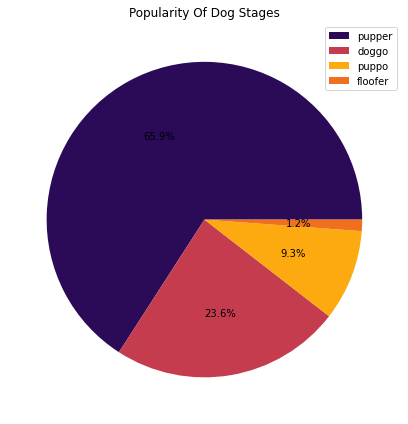

In [242]:
labels = ['pupper', 'doggo', 'puppo', 'floofer']
dataforgraph = list(df_final[df_final['dog_stage'] != 'None']['dog_stage'].value_counts())
plt.figure(figsize=[13,6])
colors=['#2b0b57','#C43C4E','#FCAA0F','#F1701F']
plt.pie(dataforgraph, colors=colors,autopct='%1.1f%%' )
plt.legend(labels)
plt.title('Popularity Of Dog Stages')
plt.tight_layout()
#counterclock=False

As showen in the above chart , pupper is the most popular dog stage in the data set .

#### What is the top 2 popular dog stages based on favorite count?

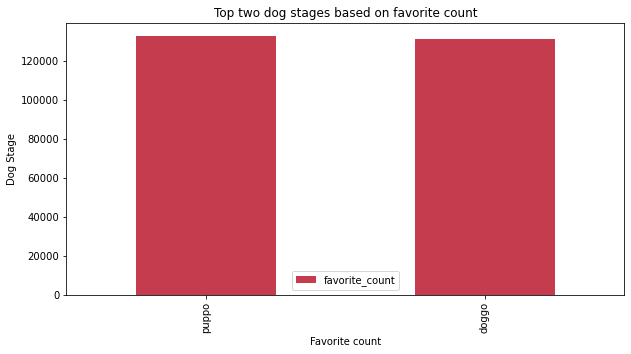

In [243]:
top_2=df_final.nlargest(2,'favorite_count')
top_2.plot(x='dog_stage', y='favorite_count', kind='bar',figsize=(10,5), color= '#C43C4E')
plt.title('Top two dog stages based on favorite count')
plt.xlabel('Favorite count')
plt.ylabel('Dog Stage');

As we can observe from the above chart , Puppo and Dogoo stages has the same popularity based on the favorite count

#### Does retweet count affect favorite count ?

Text(0.5, 1.0, 'Correlating Based On Favorite Count')

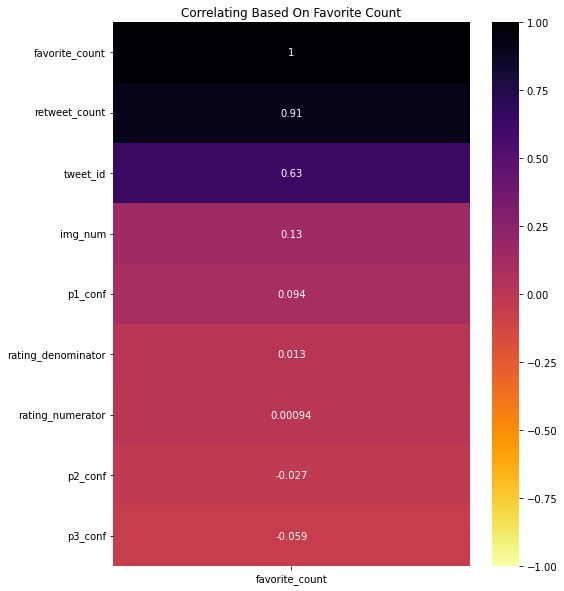

In [244]:
plt.figure(figsize=(8, 10))
##colors=['#293241','#ee6c4d','#81B29A','#Fcbf49','#f2cc8f']
##col=sns.palplot(sns.color_palette(['#293241','#ee6c4d','#81B29A','#Fcbf49','#f2cc8f']))
##cmap = sns.diverging_palette(41, 56.1, as_cmap=True)
##cmap=sns.palplot(sns.diverging_palette(250,10, 80, 50, center='dark'))
##diverging_colors = sns.color_palette("RdBu", 50)
##sns.palplot(diverging_colors)
heatmap = sns.heatmap(df_final.corr()[['favorite_count']].sort_values(by='favorite_count', ascending=False), vmin=-1, vmax=1,annot=True,cmap='inferno_r')
heatmap.set_title('Correlating Based On Favorite Count')
##sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)

The correlation between favorite count and retweet count is 0.91 which can be considered as strong positive relation between this two variables 

#### What are the top 3 popular names for dogs?

In [245]:
dog_names = df_final.name.value_counts().nlargest(5)
dog_names

None       665
Charlie     11
Lucy        11
Cooper      10
Oliver      10
Name: name, dtype: int64

We can find that Charlie is the most popular dog name in the data set. Followed by Lucy and Cooper with the same number of frequency